In [1]:
import numpy as np
import cv2 as cv
import va

# Simulazione 2022 05 05

### Descrivere gli operatori di Sobel e illustrarne brevemente alcune possibili applicazioni.

L'operatore di Sobel, è associato alle derivaste di una immagine, il filtro di Sobel permette di calcolare sia la derivata lungo X e sia la derivata lungo Y di un'immagine. Il filtro derivativo di Sobel, è il più efficiente fra quelli derivativi, tale filtro si basa su un filtro pseudo gaussiano. Le applicazioni in cui si può usare tale operatore sono diverse ma una su tutti è l'operazione di Edge Detection, ovvero ci permette di trovare i contorni di oggetti all'interno di un'immagine. Al filtro di Sobel è applicato anche un filtro di blur, il quale viene applicato in direzione ortogonale al filtro derivativo, ciò avviene dal momento in cui la derivata è sensibile al rumore. Attraverso tale filtro derivativo è poi possibile trovare anche l'angolo del gradiente, rispetto ogni pixel ed anche il modulo del gradiente di ogni singolo pixel. 

### Come è possibile, con la morfologia matematica, “riempire” piccoli “buchi” in un’immagine?

Nella morfologia matematica, possiamo trovare due principali operatori: l'operatore di apertura e l'operatore di chiusura, in questo caso per eseguire l'operazione di riempire piccoli buchi di un'immagine dobbiamo utilizzare l'operazione di chiusura. L'operazione di chiusura è composta da Dilatazione e successivamente Erosione, attraverso questa operazione è possibile riempire piccoli buchi e rafforzare regioni unite debolmente. Sia l'operazione di apertura e sia l'operazione di chiusura necessitano di un elemento strutturante, che non è altro una semplice immagine binaria con attraverso la quale vengono eseguite le operazioni di Dilatazione ed Erosione

### In cosa consiste il “template matching”?

Il template matching riguarda l'operazione di riconoscimento di oggetti all'interno di un'immagine. Il template matching consiste nell'utilizzare uno o più template, piccole immagini che riguardano l'oggetto che si vuole cercare all'interno dell'immagine principale, questo template viene fatto scorrere all'interno dell'immagine principale in cerca di possibili match. Per capire se vi è corrispondenza tra pixel dell'immagine e pixel del template si possono utilizzare diverse formule per apprendere la correlazione tra i pixel ed il template, ad esempio una possibile formula può essere il Mean Square Error, così facendo una volta che si ha fatto scorrere interamente il template all'interno dell'immagine otterremo una nuova matrice in cui sarà distribuita la probabilità che in ogni pixel ci sia il nostro oggetto del template.

### Utilizzando NumPy e OpenCV, implementare in Python la funzione esercizio(img) che riceve un’immagine grayscale img (con un byte per pixel) e deve eseguire le seguenti operazioni:

1. Calcolare, per ciascuna riga dell’immagine, la somma dei valori dei pixel: sia Ym la coordinata y della riga dell’immagine con la somma minore.

2. Binarizzare img, utilizzando come unica soglia la media dei livelli di grigio dei pixel con coordinata y minore o uguale a Ym.

3. Applicare, al risultato del passo precedente, un’operazione morfologica di dilatazione con un cerchio di diametro 3 pixel come elemento strutturante: sia img3 il risultato.

4. Costruire un’immagine contenente solo i bordi (con uno spessore di 2 pixel) delle componenti connesse dell’immagine ottenuta al punto precedente. Suggerimento: questo risultato può essere ottenuto con la differenza fra l’immagine e il risultato dell’erosione con un cerchio di diametro 2*2+1 pixel.

5. Determinare tutti i pixel di background di img3 con distanza maggiore di 4 pixel (secondo la metrica d8) dal foreground.

6. Restituire un’immagine a colori in formato BGR in cui i pixel di bordo individuati al passo 4 sono blu, i pixel individuati al punto 5 verdi e i restanti pixel hanno un valore, nel solo canale R, pari alla metà (arrotondata all’intero inferiore) della corrispondente luminosità in img.

In [77]:
def esercizio(img):
    # Parte 1
    Ym = np.argmin(np.sum(img, 1))
    # Parte 2
    _, img2 = cv.threshold(img, np.mean(img[:Ym+1,...]), 255, cv.THRESH_BINARY)
    # Parte 3
    img3 = cv.morphologyEx(img2, cv.MORPH_DILATE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3)))
    # Parte 4
    img4 = img3 - cv.morphologyEx(img3, cv.MORPH_ERODE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)))
    # Parte 5
    img5 = np.where(cv.distanceTransform(img4,cv.DIST_C, 3) > 4, 255, 0).astype(np.uint8)
    # Parte 6
    others = ~(img4 | img5)
    va.show((img4, "img4"), (img5, "img5"), ((img4 | img5), "img4 or img5"), (others, "not (img 4 or img5)"), ((img & others), "original and (not (img4 or img5))"))
    return cv.merge((img4, img5, (img & others)//2))

In [54]:
def esercizio_ottimo(img):
    # Parte 1
    Ym = np.argmin(img.sum(axis=1))
    # Parte 2
    _, img2 = cv.threshold(img, img[:Ym+1,...].mean(), 255, cv.THRESH_BINARY)
    # Parte 3
    img3 = cv.morphologyEx(img2, cv.MORPH_DILATE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3)))
    # Parte 4
    img4 = img3 - cv.morphologyEx(img3, cv.MORPH_ERODE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)))
    # Parte 5
    img5 = np.where(cv.distanceTransform(img4, cv.DIST_C, 3) > 4, 255, 0).astype(np.uint8)
    # Parte 6
    return cv.merge((img4, img5, (img & (~(img4 | img5))//2)))

""
""

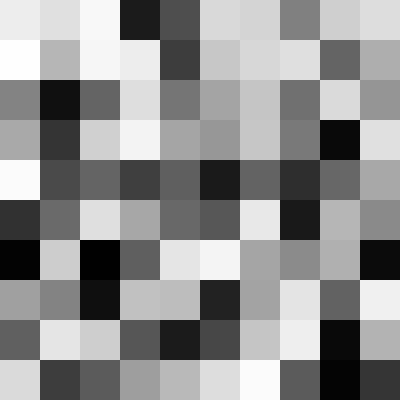

In [17]:
img = np.random.randint(0, 255, (10, 10), dtype=np.uint8)
va.show(img)


img4,img5,img4 or img5,not (img 4 or img5),original and (not (img4 or img5))
,,,,

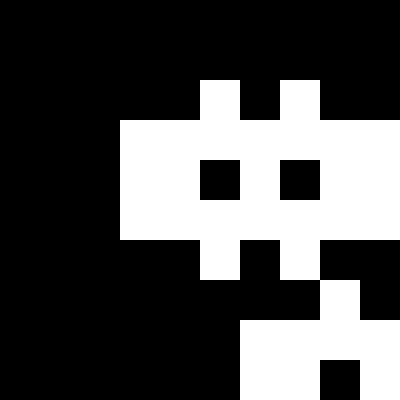
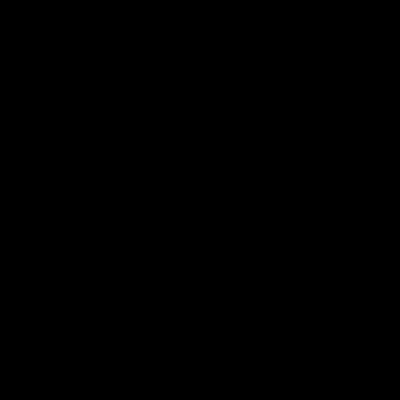
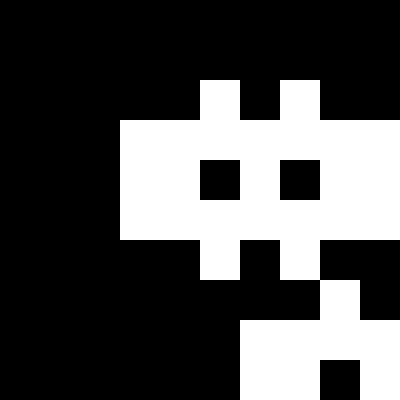
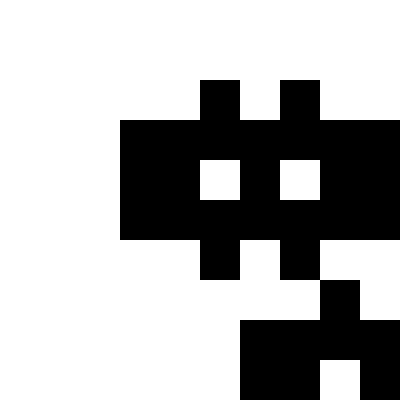
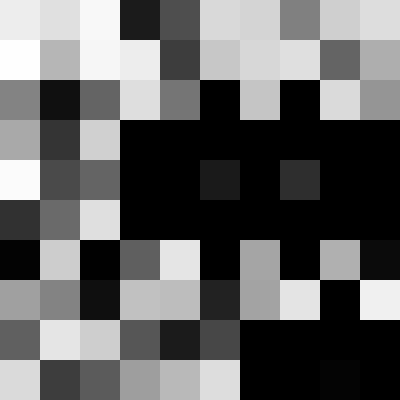

final result
""

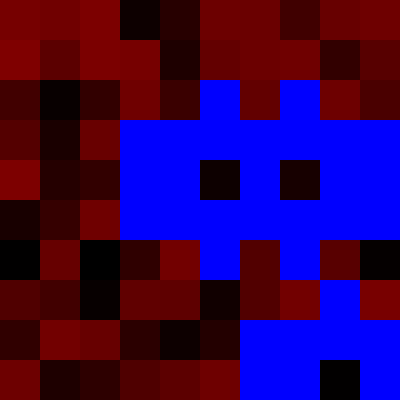

In [79]:
out = esercizio(img)
va.show((out, "final result"))

""
""

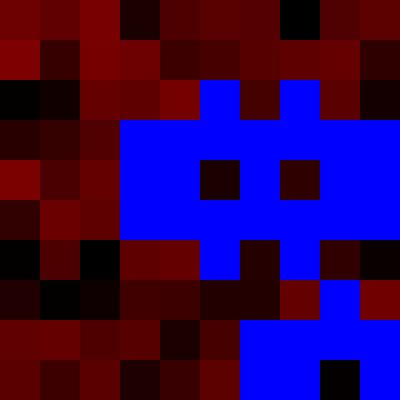

In [55]:
out2 = esercizio_ottimo(img)
va.show(out2)